# Logistic Regression and Linear SVM

We will draw couple of plots during the lecture. We activate matplotlib to show the plots inline in the notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

`scikit-learn` provides state-of-the-art machine learning algorithms. 
These algorithms, however, cannot be directly used on raw data. Raw data needs to be preprocessed beforehand. Thus, besides machine learning algorithms, `scikit-learn` provides a set of preprocessing methods. Furthermore, `scikit-learn` provides connectors for pipelining these estimators (i.e., transformer, regressor, classifier, clusterer, etc.).

In this lecture, we will present the set of `scikit-learn` functionalities allowing for pipelining estimators, evaluating those pipelines, tuning those pipelines using hyper-parameters optimization, and creating complex preprocessing steps.

## 1. Basic use-case: train and test a classifier

For this first example, we will train and test a classifier on a dataset. We will use this example to recall the API of `scikit-learn`.

We will use the `digits` dataset which is a dataset of hand-written digits.

In [2]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

Each row in `X` contains the intensities of the 64 image pixels. For each sample in `X`, we get the ground-truth `y` indicating the digit written.

In [3]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

The digit in the image is 0


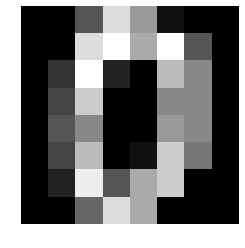

In [4]:
plt.imshow(X[0].reshape(8, 8), cmap='gray');
plt.axis('off')
print('The digit in the image is {}'.format(y[0]))

In machine learning, we should evaluate our model by training and testing it on distinct sets of data. `train_test_split` is a utility function to split the data into two independent sets. The `stratify` parameter enforces the classes distribution of the train and test datasets to be the same than the one of the entire dataset.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Once we have independent training and testing sets, we can learn a machine learning model using the `fit` method. We will use the `score` method to test this method, relying on the default accuracy metric.

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', C=1.0, multi_class='auto', max_iter=5000, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.953


Regularization strength increases in $\lambda$

slides: $\lambda$

sklearn:

regression: $\alpha = \lambda$

classification: $C = 1/\lambda$

In [7]:
clf.coef_.shape

(10, 64)

In [8]:
clf.coef_[0]

array([ 0.00000000e+00, -6.30384001e-03,  2.96004510e-02,  3.88698761e-02,
        2.65804007e-02, -6.67178917e-02, -1.31979140e-01, -1.82135723e-02,
       -1.15099549e-05, -5.44233636e-02,  3.44053170e-02,  1.81021013e-01,
        1.13009846e-02,  6.40923453e-02, -4.69913462e-02, -1.90296785e-02,
        9.94271130e-08,  2.83640922e-02,  9.38930527e-02, -5.30103048e-02,
       -2.75673390e-01,  4.64541332e-02,  6.24008434e-02, -5.61503459e-03,
        4.72715679e-08,  1.24948338e-01,  1.17692512e-01, -1.24176789e-01,
       -3.84945462e-01, -1.70700510e-02,  1.07098208e-01, -3.65307049e-05,
        0.00000000e+00,  1.70830405e-01,  4.72732710e-02, -1.66551086e-01,
       -3.25627688e-01,  7.89617891e-02,  6.21531889e-02,  0.00000000e+00,
       -5.88857709e-05,  7.04062544e-03,  1.74078556e-01, -7.00565956e-02,
       -1.48926938e-01,  1.14179999e-01,  1.07252007e-02, -6.40960559e-06,
       -2.27199611e-04, -6.42472467e-02,  8.46581908e-02, -4.98843857e-02,
        1.54396280e-01,  

In [9]:
clf.intercept_

array([  1.8870991 , -10.08535304,   2.26720202,  -3.82055539,
        16.13729243,  -4.84851607,   1.55615451,   8.99747188,
        -0.95250658, -11.13828885])

The API of `scikit-learn` is consistent across classifiers. Thus, we can easily replace the `LogisticRegression` classifier by a `LinearSVC Classifier`. These changes are minimal and only related to the creation of the classifier instance.

In [10]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1.0, max_iter=500000)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LinearSVC is 0.942


## 2. More advanced use-case: preprocess the data before training and testing a classifier

### 2.1 Standardize your data

Preprocessing might be required before learning a model. For instance, a user could be interested in creating hand-crafted features or an algorithm might make some apriori assumptions about the data. 

In our case, the solver used by the `LogisticRegression` expects the data to be normalized. Thus, we need to standardize the data before training the model. To observe this necessary condition, we will check the number of iterations required to train the model.

In [11]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000, random_state=42)

clf1.fit(X_train, y_train)
accuracy = clf1.score(X_test, y_test)

print('Accuracy score of the {} is {:.3f}'.format(clf1.__class__.__name__, accuracy))
print('{} required {} iterations to be fitted'.format(clf1.__class__.__name__, clf1.n_iter_[0]))

clf2 = LinearSVC(max_iter=500000)

clf2.fit(X_train, y_train)
accuracy = clf2.score(X_test, y_test)

print('Accuracy score of the {} is {:.3f}'.format(clf2.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.953
LogisticRegression required 2314 iterations to be fitted
Accuracy score of the LinearSVC is 0.942


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

# X_train_scaled = scaler.fit(X_train) #find min and max of each feature in the training set

# X_train_scaled = scaler.transform(X_train) #normalize the training set (using the min and max found above)

X_test_scaled = scaler.transform(X_test) #normalize the testing set (using the min and max found above)

clf1.fit(X_train_scaled, y_train)
accuracy = clf1.score(X_test_scaled, y_test)
print('Accuracy score of the {} is {:.3f}'.format(clf1.__class__.__name__, accuracy))
print('{} required {} iterations to be fitted'.format(clf1.__class__.__name__, clf1.n_iter_[0]))

clf2.fit(X_train_scaled, y_train)
accuracy = clf2.score(X_test_scaled, y_test)
print('Accuracy score of the {} is {:.3f}'.format(clf2.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.962
LogisticRegression required 192 iterations to be fitted
Accuracy score of the LinearSVC is 0.969


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf1.fit(X_train_scaled, y_train)
accuracy = clf1.score(X_test_scaled, y_test)
print('Accuracy score of the {} is {:.3f}'.format(clf1.__class__.__name__, accuracy))
print('{} required {} iterations to be fitted'.format(clf1.__class__.__name__, clf1.n_iter_[0]))

clf2.fit(X_train_scaled, y_train)
accuracy = clf2.score(X_test_scaled, y_test)
print('Accuracy score of the {} is {:.3f}'.format(clf2.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.978
LogisticRegression required 89 iterations to be fitted
Accuracy score of the LinearSVC is 0.951


The `MinMaxScaler` and `StandardScaler` transformers are used to normalise the data. Other scalers include `RobustScaler` and `Normalizer`. The scaler should be applied in the following way: learn (i.e., `fit` method) the statistics on a training set and standardize (i.e., `transform` method) both the training and testing sets. Finally, we will train and test the model and the scaled datasets.

By scaling the data, the convergence of the model happened much faster than with the unscaled data.

For any feature: 

MinMaxScaler: (x-min)/(max-min)

StandardScaler: (x-mean)/standard deviation;

RobustScaler: (x-median)/(75% quantile - 25% quantile)

for any observation:
Normalizer

<img src="images/scaler_comparison_scatter.png">

### 2.2 The wrong preprocessing patterns

We highlighted how to preprocess and adequately train a machine learning model. It is also interesting to spot what would be the wrong way of preprocessing data. There are two potential mistakes which are easy to make but easy to spot.

The first pattern is to standardize the data before spliting the full set into training and testing sets.

In [14]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_prescaled, X_test_prescaled, y_train_prescaled, y_test_prescaled = train_test_split(
    X_scaled, y, stratify=y, random_state=42)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_prescaled, y_train_prescaled)
accuracy = clf.score(X_test_prescaled, y_test_prescaled)
print('Accuracy score of the {} is {:.3f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.962


The second pattern is to standardize the training and testing sets independently. It comes back to call the `fit` methods on both training and testing sets. Thus, the training and testing sets are standardized differently.

In [15]:
scaler = MinMaxScaler()
X_train_prescaled = scaler.fit_transform(X_train)
X_test_prescaled = scaler.fit_transform(X_test)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_prescaled, y_train)
accuracy = clf.score(X_test_prescaled, y_test)
print('Accuracy score of the {} is {:.3f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.962


<img src="images/no_separate_scaling.png">

### 2.3 Keep it simple, stupid: use the pipeline connector from `scikit-learn`

The two previous patterns are an issue with data leaking. However, this is difficult to prevent such a mistake when one has to do the preprocessing by hand. 

Thus, `scikit-learn` introduced the `Pipeline` object. It sequentially connects several transformers and a classifier (or a regressor). We can create a pipeline as:

In [16]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('clf', LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42))])

We see that this pipeline contains the parameters of both the scaler and the classifier. The general pipeline can join any number of estimators together. For example, you could build a pipeline containing feature extraction, feature selection, scaling, and classification, for a total of four steps. Similarly, the last step could be regression or clustering instead of classification. 

Sometimes, it can be tedious to give a name to each estimator in the pipeline. `make_pipeline` will give a name automatically to each estimator which is the lower case of the class name.

In [17]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, max_iter=1000))

The pipeline will have an identical API. We use `fit` to train the classifier and `score` to check the accuracy. However, calling `fit` will call the method `fit_transform` of all transformers in the pipeline. Calling `score` (or `predict` and `predict_proba`) will call internally `transform` of all transformers in the pipeline. 

In [18]:
pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(pipe.__class__.__name__, accuracy))

Accuracy score of the Pipeline is 0.962


We can check all the parameters of the pipeline using `get_params()`.

In [19]:
pipe.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('logisticregression',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=1000, multi_class='auto',
             n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
             tol=0.0001, verbose=0, warm_start=False))],
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='auto',
           n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__int

## 3 Cross Validation

`scikit-learn` provides three functions: `cross_val_score`, `cross_val_predict`, and [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html). The latter provides more information regarding fitting time, training and testing scores. I can also return multiple scores at once.

In [20]:
from sklearn.model_selection import cross_validate

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='lbfgs', multi_class='auto',
                                        max_iter=1000, random_state=42))
scores = cross_validate(pipe, X, y, cv=3, return_train_score=True)

Using the cross-validate function, we can quickly check the training and testing scores and make a quick plot using `pandas`.

In [21]:
import pandas as pd

df_scores = pd.DataFrame(scores)
df_scores

fit_time  score_time  test_score  train_score
0  0.140623    0.000998    0.925249     0.988285
1  0.106717    0.000000    0.943239     0.984975
2  0.111698    0.000000    0.924497     0.993339

In [22]:
print("Mean times and scores:\n", df_scores.mean())

Mean times and scores:
 fit_time       0.119679
score_time     0.000333
test_score     0.930995
train_score    0.988866
dtype: float64


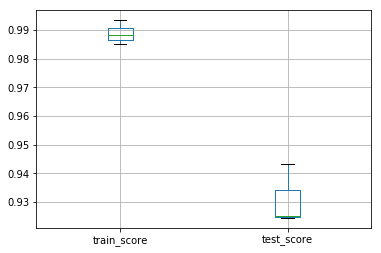

In [23]:
df_scores[['train_score', 'test_score']].boxplot()

## 4. Hyper-parameters optimization: fine-tune the inside of a pipeline using GridSearchCV

Sometimes you would like to find the parameters of a component of the pipeline which lead to the best accuracy. We already saw that we could check the parameters of a pipeline using `get_params()`.

In [24]:
pipe.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('logisticregression',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=1000, multi_class='auto',
             n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
             tol=0.0001, verbose=0, warm_start=False))],
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='auto',
           n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__int

Hyper-parameters can be optimized by an exhaustive search. [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) provides such utility and does a cross-validated grid-search over a parameter grid.

Let's give an example in which we would like to optimize the `C` and `penalty` parameters of the `LogisticRegression` classifier.

In [25]:
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='saga', multi_class='auto',
                                        random_state=42, max_iter=5000))
param_grid = {'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='saga',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'logisticregression__C': [0.1, 1.0, 10], 'logisticregression__penalty': ['l2', 'l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

When fitting the grid-search object, it finds the best possible parameter combination on the training set (using cross-validation). We can introspect the results of the grid-search by accessing the attribute `cv_results_`. It allows us to check the effect of the parameters on the model performance.

In [26]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.283754      0.013802         0.005422    2.008389e-03   
1       0.750687      0.173824         0.001663    1.695451e-03   
2       0.952433      0.017516         0.000998    1.946680e-07   
3       3.679312      1.044898         0.000333    4.704712e-04   
4       2.514586      0.263775         0.000998    5.947204e-07   
5       9.216869      1.238863         0.000665    4.705279e-04   

  param_logisticregression__C param_logisticregression__penalty  \
0                         0.1                                l2   
1                         0.1                                l1   
2                           1                                l2   
3                           1                                l1   
4                          10                                l2   
5                          10                                l1   

                                              params  split0_test_score  \
0  {'logisticregression__C': 0.1, 'logisticregres...           0.951542   
1  {'logisticregression__C': 0.1, 'logisticregres...           0.885463   
2  {'logisticregression__C': 1.0, 'logisticregres...           0.977974   
3  {'logisticregression__C': 1.0, 'logisticregres...           0.964758   
4  {'logisticregression__C': 10, 'logisticregress...           0.977974   
5  {'logisticregression__C': 10, 'logisticregress...           0.973568   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.935268           0.941573         0.942836        0.006717   
1           0.908482           0.883146         0.892353        0.011425   
2           0.955357           0.957303         0.963623        0.010263   
3           0.950893           0.943820         0.953229        0.008710   
4           0.962054           0.964045         0.968077        0.007103   
5           0.957589           0.950562         0.960653        0.009643   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.952968            0.959956   
1                6            0.905935            0.902113   
2                2            0.985442            0.987764   
3                4            0.977604            0.977753   
4                1            1.000000            1.000000   
5                3            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.952328          0.955084         0.003455  
1            0.902439          0.903496         0.001730  
2            0.986696          0.986634         0.000949  
3            0.981153          0.978837         0.001639  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

In [27]:
param_grid

{'logisticregression__C': [0.1, 1.0, 10],
 'logisticregression__penalty': ['l2', 'l1']}

In [28]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_logisticregression__C', columns='param_logisticregression__penalty')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))

In [29]:
res

param_logisticregression__penalty     l1     l2
0.1                                0.892  0.943
1.0                                0.953  0.964
10.0                               0.961  0.968

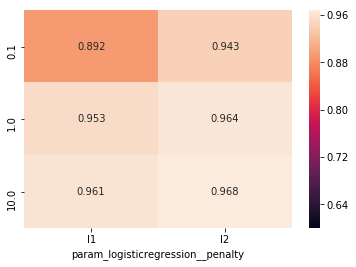

In [30]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

By default, the grid-search object is also behaving as an estimator. Once it is fitted, calling `score` will fix the hyper-parameters to the best parameters found.

In [31]:
grid.best_params_

{'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}

In [32]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('logisticregression', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='saga',
          tol=0.0001, verbose=0, warm_start=False))])


In [33]:
print("Logistic regression step:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"]))

Logistic regression step:
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)


In [34]:
print("Logistic regression coefficients:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"].coef_))

Logistic regression coefficients:
[[ 0.00000000e+00 -1.03876781e-01  9.78175742e-02  6.75104096e-01
   1.67449815e-01 -8.91859368e-01 -9.26870306e-01 -1.19321074e-01
  -3.68210118e-03 -4.19285459e-01  2.20611842e-01  1.16619671e+00
   4.00501029e-01  7.95458012e-01 -3.41012961e-01 -1.47979881e-01
  -5.83333273e-06  2.54594401e-01  9.95136382e-01 -4.80175165e-01
  -2.19413919e+00  7.85849291e-01  6.03428944e-01 -6.20527350e-02
  -5.18594197e-05  1.00543208e+00  1.01228546e+00 -1.16056001e+00
  -3.54449354e+00 -1.76728639e-01  1.02753233e+00 -2.66715641e-02
   0.00000000e+00  1.50415368e+00  5.88047094e-01 -1.56131655e+00
  -2.89806723e+00  3.92655496e-01  7.57661638e-01  0.00000000e+00
  -2.68750940e-02  1.01450546e-01  1.65605414e+00 -6.95809252e-01
  -1.48416258e+00  8.59487888e-01  3.06213457e-01 -1.40978545e-03
  -2.33547147e-02 -5.19665898e-01  7.76694168e-01 -1.88331455e-01
   1.00322504e+00  3.70643455e-01 -3.02266038e-01 -3.21687309e-02
  -1.61512205e-04 -2.39730524e-02 -1.35409

Besides this is possible to call the grid-search as any other classifier to make predictions.

In [35]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.964


Up to know, we only make the fitting of the grid-search on a single split. However, as previously stated, we might be interested to make an outer cross-validation to estimate the performance of the model and different sample of data and check the potential variation in performance. Since grid-search is an estimator, we can use it directly within the `cross_validate` function. 

In [36]:
scores = cross_validate(grid, X, y, cv=3, n_jobs=-1, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores

fit_time  score_time  test_score  train_score
0    50.886   9.980e-04       0.929        0.986
1    51.643   0.000e+00       0.947        0.997
2    50.104   1.000e-03       0.924        0.993

## 5. Summary: my scikit-learn pipeline in less than 10 lines of code (skipping the import statements)

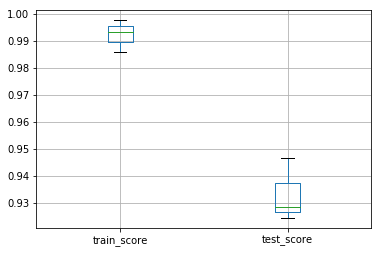

In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='saga', multi_class='auto', random_state=42, max_iter=5000))
param_grid = {'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1)
scores = pd.DataFrame(cross_validate(grid, X, y, cv=3, n_jobs=-1, return_train_score=True))
scores[['train_score', 'test_score']].boxplot()